### Histogram
Create a histogram to visualize the most common salary ranges for employees.

### Bar Plot
Create a bar chart of average salary by title.

### Epilogue
"Search your ID number." Your employee ID number is 499942.


Import libraries

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
from matplotlib.pyplot import hist

Import more libraries, keys, start postgres login information

In [42]:
import sqlalchemy
import psycopg2
import logging
from config import ADDRESS,PORTNUM,USERNAME,PW,DBNAMEPC
from sqlalchemy import create_engine

log = logging.getLogger(__name__)

# Postgres username, password, and database name
POSTGRES_ADDRESS = ADDRESS ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = PORTNUM
POSTGRES_USERNAME = USERNAME ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = PW ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD
POSTGRES_DBNAME = DBNAMEPC ## CHANGE THIS TO YOUR DATABASE NAME

# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
    .format(username=POSTGRES_USERNAME,
    password=POSTGRES_PASSWORD,
    ipaddress=POSTGRES_ADDRESS,
    port=POSTGRES_PORT,
    dbname=POSTGRES_DBNAME))


Create a connection

In [3]:
# Create the connection
cnx = create_engine(postgres_str) 
cnx

Create a dataframe, call a query with new connection.

In [5]:
# Create VAR of dataframe with most common salary ranges query
most_common_salary_range_df = pd.read_sql_query('''SELECT salaries.salary,COUNT(*) AS "Most_Common_Salary_Ranges" FROM salaries
GROUP BY salaries.salary;''', cnx)

## Filtered 

In [12]:
mcsr_df_filtered = most_common_salary_range_df.sort_values(by='Most_Common_Salary_Ranges', ascending=False)
mcsr_df_filtered

,salary,Most_Common_Salary_Ranges
8607,40000,95346
22953,55581,19
31249,53738,18
44849,53078,18
10524,47454,17
...,...,...
26493,101529,1
8162,82686,1
26491,61152,1
8163,100162,1


# **Histogram**

## Top 5 most common salaries by count. 

In [30]:
mcsr_df_filtered=mcsr_df_filtered.reset_index(drop=True)

In [40]:
mcsr_top5=mcsr_df_filtered[0:10]
mcsr_top5

,salary,Most_Common_Salary_Ranges
0,40000,95346
1,55581,19
2,53738,18
3,53078,18
4,47454,17
5,45184,17
6,44564,17
7,53783,16
8,47038,16
9,45050,16


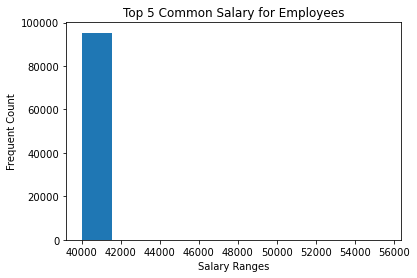

In [46]:
hist(mcsr_top5.salary, weights=mcsr_top5.Most_Common_Salary_Ranges)
plt.xlabel('Salary Ranges')
plt.ylabel('Frequent Count')
plt.title('Top 5 Common Salary for Employees')
plt.show()

One value stands out above all of the other salaries counted. **The salary of '40000' has a count, or occures '95346'** times. The second largest counted salary is '55581' with a count of '19'. The rest of the Top 10 count are below '19'. 

## Top 5 without salary 40k

In [38]:
# Top 10 without salary 40k
mcsr_top5_filtered=mcsr_df_filtered[1:6]
mcsr_top5_filtered

,salary,Most_Common_Salary_Ranges
1,55581,19
2,53738,18
3,53078,18
4,47454,17
5,45184,17


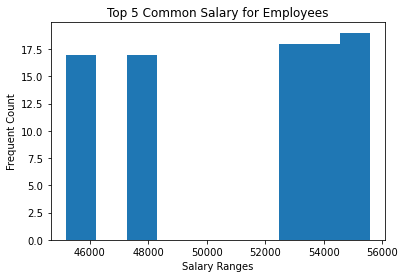

In [47]:
hist(mcsr_top5_filtered.salary, weights=mcsr_top5_filtered.Most_Common_Salary_Ranges)
plt.xlabel('Salary Ranges')
plt.ylabel('Frequent Count')
plt.title('Top 5 Common Salary for Employees')
plt.show()

Without the count of 95346, we can see the original dataset for salaries. 

# **Bar Plot**

In [48]:
# Create VAR of dataframe with most common salary ranges query
salary_title_df = pd.read_sql_query('''SELECT salaries.salary, titles.title FROM titles
INNER JOIN employees ON employees.emp_title_id=titles.title_id 
INNER JOIN salaries ON salaries.emp_no=employees.emp_no;''', cnx)

In [49]:
avg_salary_title=salary_title_df.groupby('title').mean().round(decimals=2)
avg_salary_title

,salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


## Bar Chart: Average Salary by Job Title

In [50]:
# Make a fake dataset:
values = avg_salary_title.salary.tolist()
bars = avg_salary_title.index.tolist()
y_pos = np.arange(len(bars))

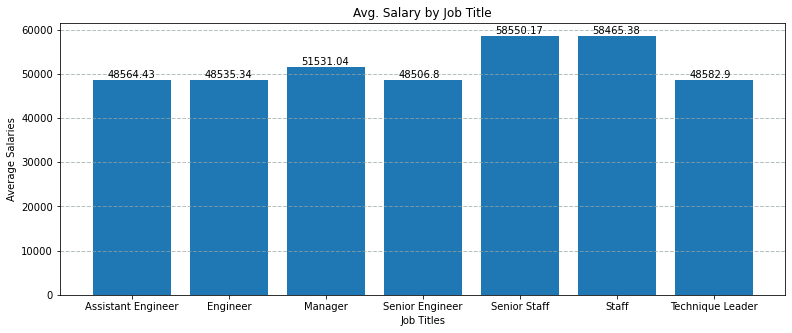

In [65]:
# Figure size
f, ax = plt.subplots(figsize=(13,5))

# Create bars
plt.bar(y_pos, values)

# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Values on top of bars
for i, v in enumerate(values):
    plt.text(y_pos[i] - 0.25, v + 500.00, str(v))
    
# Create labels
plt.ylabel('Average Salaries')
plt.xlabel('Job Titles')
plt.title('Avg. Salary by Job Title')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

# Show graphic
plt.show()

# **Epilogue**

In [53]:
# Create VAR of dataframe with most common salary ranges query
emp_499942 = pd.read_sql_query('''SELECT employees.emp_no,
employees.first_name,
employees.last_name,
salaries.salary

FROM salaries
-- WHERE employees.emp_no = '499942'
INNER JOIN employees ON employees.emp_no=salaries.emp_no AND employees.emp_no = '499942';''', cnx)

In [54]:
emp_499942

,emp_no,first_name,last_name,salary
0,499942,April,Foolsday,40000


Facepalm. I am part of the fake salary data.